In [1]:
!pip install scanpy==1.10.2 anndata==0.10.8 umap-learn==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.2 pynndescent==0.5.13 h5py==3.9.0


  error: subprocess-exited-with-error
  
  × Building wheel for h5py (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [114 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-312\h5py
      copying h5py\h5py_warnings.py -> build\lib.win-amd64-cpython-312\h5py
      copying h5py\ipy_completer.py -> build\lib.win-amd64-cpython-312\h5py
      copying h5py\version.py -> build\lib.win-amd64-cpython-312\h5py
      copying h5py\__init__.py -> build\lib.win-amd64-cpython-312\h5py
      creating build\lib.win-amd64-cpython-312\h5py\_hl
      copying h5py\_hl\attrs.py -> build\lib.win-amd64-cpython-312\h5py\_hl
      copying h5py\_hl\base.py -> build\lib.win-amd64-cpython-312\h5py\_hl
      copying h5py\_hl\compat.py -> build\lib.win-amd64-cpython-312\h5py\_hl
      copying h5py\_hl\dataset.py -> build\lib.win-amd64-cpython-312\h5py\_hl
      copying h5py\_hl\datatype.py -> build\lib.win-amd64-cpython-3


  Using cached scanpy-1.10.2-py3-none-any.whl.metadata (9.3 kB)
  Using cached anndata-0.10.8-py3-none-any.whl.metadata (6.6 kB)
  Using cached pandas-2.1.4-cp312-cp312-win_amd64.whl.metadata (18 kB)
  Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached h5py-3.9.0.tar.gz (402 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached scanpy-1.10.2-py3-none-any.whl (2.1 MB)
Using cached anndata-0.10.8-py3-none-any.whl (124 kB)
Using cached pandas-2.1.4-cp312-cp312-win_amd64.whl (10.5 MB)
Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl (9.1 MB)
Failed to build h5py


In [57]:
!pip install igraph

In [58]:
!pip install leidenalg


In [59]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pooch

In [60]:
pip install rpy2

In [61]:
import rpy2.robjects as ro

In [62]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13


In [63]:
adata = sc.read_h5ad("dataset.h5ad")

In [64]:
gene_names = pd.read_csv('gene_names.csv', header=None)

In [65]:
if len(gene_names) == adata.shape[1] + 1:
    gene_names = gene_names.iloc[1:]
adata.var_names = gene_names[0].values

# Quality Control(QC)

In [66]:
adata.obs['n_counts'] = adata.X.sum(axis=1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1)

In [67]:
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(axis=1) / adata.obs['n_counts']

In [68]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [69]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

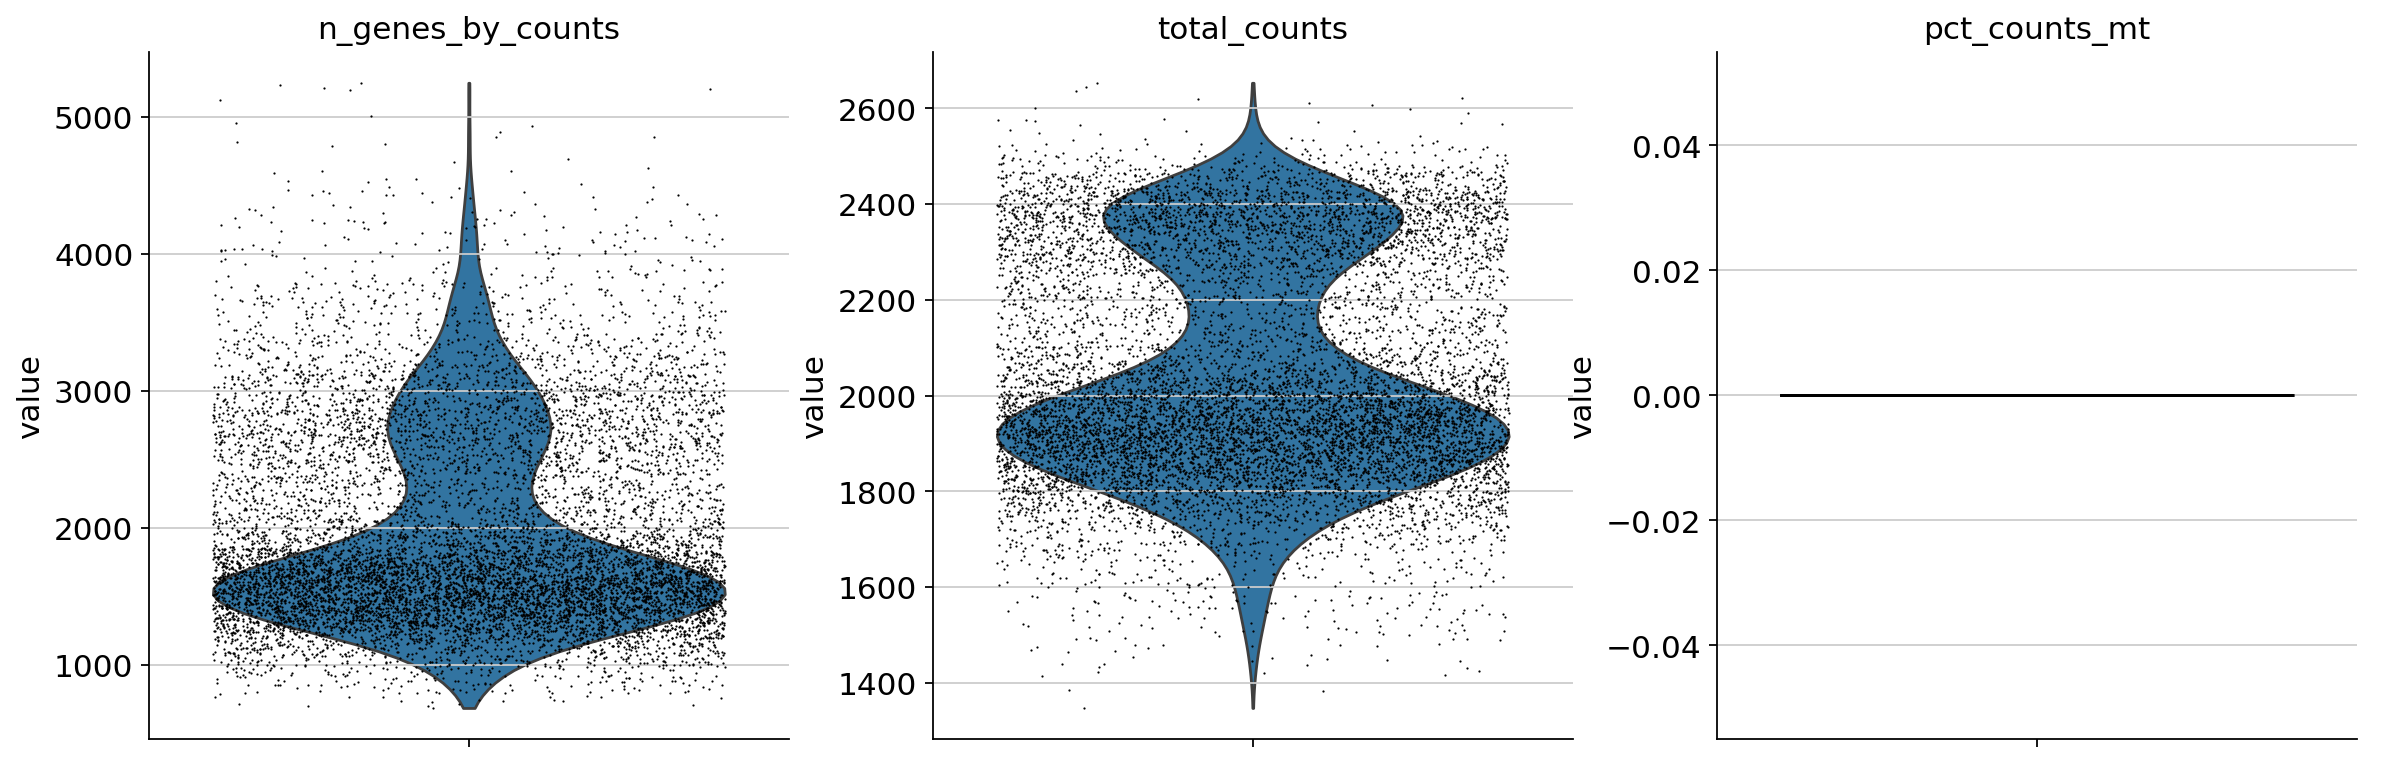

In [70]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

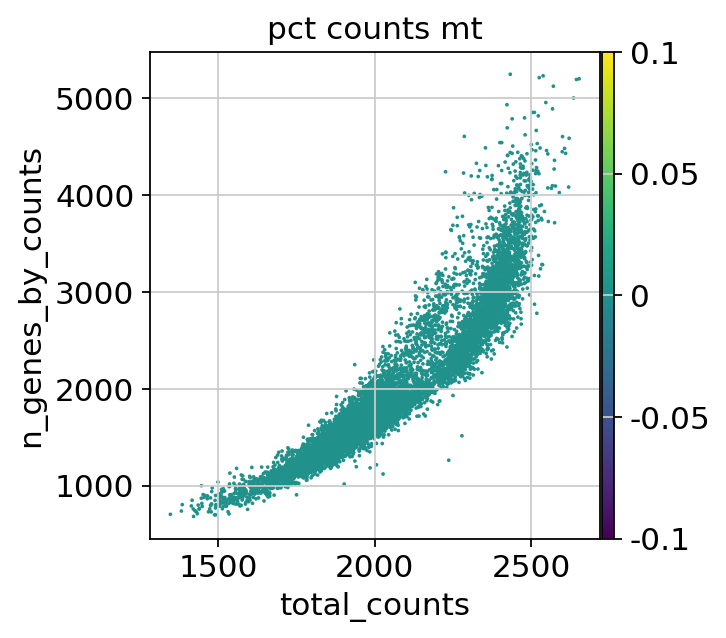

In [71]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [72]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 74 genes that are detected in less than 3 cells


In [73]:
sc.pp.scrublet(adata)

Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.24
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 69.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.2%
    Scrublet finished (0:01:48)


In [74]:
adata.layers["counts"] = adata.X.copy()

In [75]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [76]:
pip install rpy2

In [77]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

In [78]:
pandas2ri.activate()

In [81]:
!apt-get install -y r-base
!R -e "install.packages('BiocManager', repos='https://cloud.r-project.org/')"
!R -e "BiocManager::install('scater')"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

R version 4.4.1 (2024-06-14) -- "Race for Your Life"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('BiocManager', repos='https://cloud.r-project.org/')
Installing package into ‘/u

In [82]:
%load_ext rpy2.ipython


In [ ]:
ro.r('''
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("plger/pipeComp", build_vignettes=TRUE)
''')

In [ ]:
pipeComp = importr('pipeComp')

In [ ]:
ro.r('''
library(pipeComp)

my_pipeline <- PipelineDefinition(
    list(
        step1 = function(x, deviance_params) {
            selected_genes <- deviance_selection(x, deviance_params)
            return(selected_genes)
        },
    step2 = function(x) {
            normalized_data <- normalize_data(x)
            return(normalized_data)
        }
    )
)
''')

In [ ]:
ro.r('''
datasets <- list()  
alternatives <- list(
    deviance_params=c("some_params"),
    other_params=c("more_params")
)

res <- runPipeline(datasets, alternatives, my_pipeline, nthreads=3, output.prefix="myfolder/")
''')

In [87]:
%%R
BiocManager::install(c("scater", "other_dependencies_if_any"))


In [89]:
!apt-get install -y git
!git clone https://github.com/plger/pipeComp.git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Cloning into 'pipeComp'...
remote: Enumerating objects: 1770, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 1770 (delta 153), reused 263 (delta 151), pack-reused 1495 (from 1)
Receiving objects: 100% (1770/1770), 2.53 MiB | 28.17 MiB/s, done.
Resolving deltas: 100% (1125/1125), done.


In [91]:
%%R
install.packages("pipeComp", repos = NULL, type = "source")


In [ ]:
adata_X = adata.X.toarray()
ro.globalenv['adata_X'] = ro.r.matrix(adata_X, nrow=adata_X.shape[0], ncol=adata_X.shape[1])

In [ ]:
n_top_genes = 2000

# Get top genes by deviance
ro.globalenv['n_top_genes'] = n_top_genes
top_genes = ro.r('select_variable_genes_deviance(adata_X, n_top_genes)')
top_genes = [int(gene) for gene in top_genes]

# Filter the AnnData object for the selected genes
adata = adata[:, top_genes]

In [ ]:
sc.tl.pca(adata)

In [ ]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

In [ ]:
sc.pp.neighbors(adata)

In [ ]:
sc.tl.umap(adata)

In [ ]:
sc.tl.leiden(adata, flavor="igraph", n_iterations=-1)

In [ ]:
sc.pl.umap(adata, color=["leiden"])

In [ ]:
sc.pl.umap(
    adata,
    color=["leiden", "predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
)

In [ ]:
for res in [0.25, 0.5,0.75, 1.0]:
  res_str = f"{res:.2f}".replace('.', '_')
  sc.tl.leiden(
        adata, key_added=f"leiden_res_{res_str}", resolution=res, flavor="igraph"
    )

In [ ]:
sc.pl.umap(
    adata,
    color=["leiden_res_0_25", "leiden_res_0_50","leiden_res_0_75", "leiden_res_1_00"],
    legend_loc="on data",
)

In [ ]:
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0_50", method="wilcoxon", key_added = "dea_leiden_0_5")

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0_50", standard_scale="var", n_genes=5, key="dea_leiden_0_5"
)

In [ ]:
sc.tl.filter_rank_genes_groups(
    adata,
    min_in_group_fraction=0.2,
    max_out_group_fraction=0.2,
     key="dea_leiden_0_5",
    key_added="filtered0_5",
    )

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0_50", standard_scale="var", n_genes=5, key="filtered0_5"
)

In [ ]:
cl_annotations = {
    '1': "dendritic", '2': "dendritic", '0': "germ cells", '3': "gamma delta T cells", '4': "b cells",
    '5': "t cells", '6': "unknown", '7': "NK cells", '8': "dendritic", '9': "germ cells",
    '10': "b cells", '11': "dendritic", '12': "dendritic",'13':"b cells"
}


adata.obs["manual_celltype_annotation"] = adata.obs['leiden_res_0_50'].map(cl_annotations)


adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].fillna("unknown")


sc.pl.umap(
    adata,
    color=["manual_celltype_annotation"],
)

In [ ]:
sc.pl.umap(adata, color=["CD3D", "CD79A", "NKG7","CD4"])